# Building Support Vector Machine from Scratch

Here, we import the necessary packages

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

Here, we apply a sklearn package to generate our data.

In [68]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3)
np.place(y, y==0, -1)

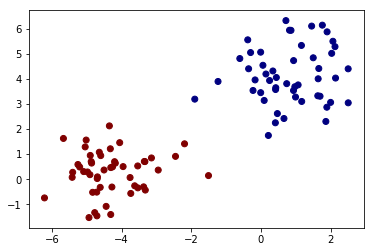

In [71]:
plt.figure(figsize = (6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

---

### Representation: Support Vector Machine

Generally speaking, (in 2-d) a support vector machine classifies our data by finding the line that perfectly separates the two classes.
![Machine Learning Algorithms](Figures/many_hyps.png)

There is, however, a potentially infinite amount of separating lines... how can we determine the optimal one?

Well, naturally, we want to choose the line that maximizes the margin between the two classes.

![Machine Learning Algorithms](Figures/max_margin.png)

If we define the equation of our line to be $$y=mx+b$$ per usual, then this translates to finding the optimal $m$ and $b$.

#### The definition of a Hyperplane:
A hyperplane in two dimensions is defined as: $$\beta_0+\beta_1X_1+\beta_2X_2=0$$

With the following algebraic manipulation, we can see how a 2-d hyperplane is equivalent to a line
\begin{align*}
	\beta_0+\beta_1X_1+\beta_2X_2&=0\\
	\beta_2X_2&=-\beta_1X_1-\beta_0\\
	X_2&= \frac{-\beta_1X_1}{\beta_2}-\frac{\beta_0}{\beta_2}
\end{align*}
given that $\frac{-\beta_1}{\beta_2}=m$ and $\frac{\beta_0}{\beta_2}=b$

>A note on notation: A hyperplane is defined this way, as it is simpler to express it when we move into greater dimensions. In our crash data, we use over 14 variables, so the equation for the separating hyperplane will look like this:
$$\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_7X_7 + \beta_8X_8 + \beta_9X_9 + \beta_{10}X_{10} + \beta_{11}X_{11} + \beta_{12}X_{12} + \beta_{13}X_{13} + \beta_{14}X_{14}=0$$
For the human, this is incredibly difficult to work work, for the machine, it is simple. Additionally, this is also the dot product of $\overrightarrow{\beta}$ and $\overrightarrow{X}$.

In [28]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [29]:
X = add_intercept(X)
w = np.zeros(len(X[0]))

### Evaluation: Hinge Loss Function

#### Quick refresher on dot product
Algebraically, the dot product is defined as follows:
for two vectors $$\overrightarrow{x}=\left[\begin{matrix}
x_1\\
y_1\\
\end{matrix}
\right],\ 
\overrightarrow{y} = \left[\begin{matrix}
y_1\\
y_2\\
\end{matrix}
\right]
$$
The dot product is (note that this is a scalar value):
$$\overrightarrow{x} \cdot \overrightarrow{y} = x_1y_1+x_2y_2$$

#### The Hinge Loss Function is defined as:

$$Loss\ (\overrightarrow{w}, X^{(i)}, y^{(i)}) = \left[ 1 - y^{(i)} \cdot (\overrightarrow{w} \cdot X^{(i)}) \right]_+$$

This is why we need a regularization term
![Skewed hyp](Figures/skewed_hyp.png)

#### Hinge Loss with regularization term:

$$Loss\ (\overrightarrow{w}, X^{(i)}, y^{(i)}) = \left[ 1 - y^{(i)} \cdot (\overrightarrow{w} \cdot X^{(i)}) \right]_+ + \Sigma_{i}^{n}\ w_i^2$$

In [30]:
def hinge_loss(X_i, y_i, weights):
    loss = 1 - y_i * np.dot(weights.T, X_i)
    if loss < 0:
        loss = 0
    return loss

In [31]:
loss = []
for i in range(len(X)):
    loss.append(hinge_loss(X[i], y[i], w))
total_loss = np.sum(loss)
total_loss

100.0

In [32]:
w

array([ 0.,  0.,  0.])

### Optimization: Stochastic Gradient Descent
* [super helpful explanations of all types of gradient descent](https://am207.github.io/2017/wiki/gradientdescent.html#stochastic-gradient-descent)

In [33]:
learning_rate = 1
num_iters = 1000
w = np.zeros(len(X[0]))
# lambda = 1/iteration
loss_hist = []

def Stochastic_Gradient_Descent(X, y, learning_rate, num_iters):
    #X = add_intercept(X)
    weights = np.zeros(len(X[0]))
    for iteration in range(1, num_iters):
        for row in range(len(X)):
            loss = hinge_loss(X[row], y[row], weights)
            if loss == 0:
                weights = weights - learning_rate * ((2  * (1/iteration) * weights))
            else:
                weights = weights - learning_rate * ((-y[row] * X[row]) + (2  * (1/iteration) * weights))
    return weights
            

In [34]:
weights = Stochastic_Gradient_Descent(X = X, y=y, learning_rate=1, num_iters = 1000)

In [35]:
weights

array([  2.12889977e-03,  -3.55624119e+00,  -2.75181965e+00])

In [36]:
loss = []
for i in range(len(X)):
    loss.append(hinge_loss(X[i], y[i], weights))
total_loss = np.sum(loss)
total_loss

0

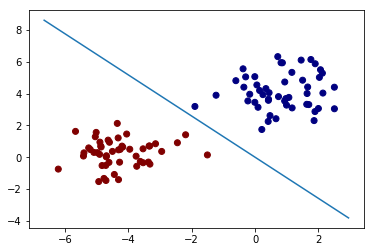

In [37]:
# it works, we've found the perfectly separating hyperplane!
plt.scatter(X[:,1], X[:,2], c=y, cmap = 'jet')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
plt.plot(xx, (-weights[1]/weights[2]) * xx - (weights[0]/weights[2]))

Text(0,0.5,'loss')

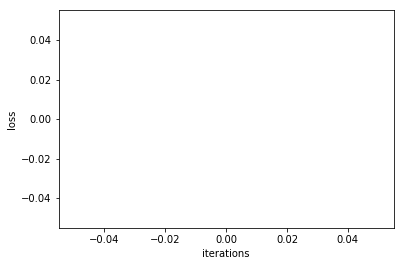

In [58]:
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel('iterations')
plt.ylabel('loss')

In [59]:
min(loss_hist)

ValueError: min() arg is an empty sequence

---

---

---

# Applying SVM to GR Crash Data

* Instead of their traditional SVM, I could use the [Stochastic Gradient Descent Classifier](http://scikit-learn.org/stable/modules/sgd.html)

```python
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, penalty="l2", fit_intercept=True)
clf.fit(X, y)
```

Note that `SVC(kernel="linear")` is equivalent to `SGDClassifier(loss="hinge")` as [scikit-learn's documentation indicates](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-unbalanced-py)

In [40]:
X_cols = ['X', 'Y', 'DRIVER1AGE', 'NUMOFINJ', 'HOUR_X', 'HOUR_Y',
          'CRASHSEVER_Fatal', 'CRASHSEVER_Injury', 'DRIVER1SEX_M', 'DRIVER1SEX_U',
          'HITANDRUN_Yes', 'MOTORCYCLE_Yes',
          'D1COND_Appeared Normal', 'D1COND_Fatigue / Sick']
y_cols = 'D1DRINKIN_Yes'

In [41]:
crash_data = pd.read_csv('Data/Crash_data_prepared.csv')
X = crash_data.loc[:, X_cols]
y = crash_data.loc[:, y_cols]

## Statistical Re-sampling
Since the recall was still very low after training our SVM, we will use a statistical re-sampling technique designed for dealing with imbalanced classes, like ours. We'll be using some tools from the [imbalanced-learn package](http://contrib.scikit-learn.org/imbalanced-learn/stable/under_sampling.html)

* `Recall` is our metric of choice. [this article](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c) provides a great explanation for why
    * In our instance, we're okay with incorectly guessing that there was alcohol involved with some car crashes, if it means predicting all the instances when there was alcohol involved
    * Generally speaking, when dealing with an imbalanced dataset, oversampling is a good technique to increase recall
* [this](https://beckernick.github.io/oversampling-modeling/) is a great article on the right way to oversmple.

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=742)

In [44]:
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train)

In [45]:
print(sorted(Counter(y_train_resampled).items()))

[(0, 52717), (1, 52717)]


In [50]:
clf = SVC(kernel='linear')
clf.fit(X_train_resampled, y_train_resampled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95     17543
          1       0.30      0.94      0.46       702

avg / total       0.97      0.91      0.93     18245



In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True negatives:', tn)
print('True positives:', tp)
print('False negatives:', fn)
print('False Positives:', fp)
print('\n', confusion_matrix(y_test, y_pred))

True negatives: 16032
True positives: 657
False negatives: 45
False Positives: 1511

 [[16032  1511]
 [   45   657]]


In [63]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.06  0.94]]


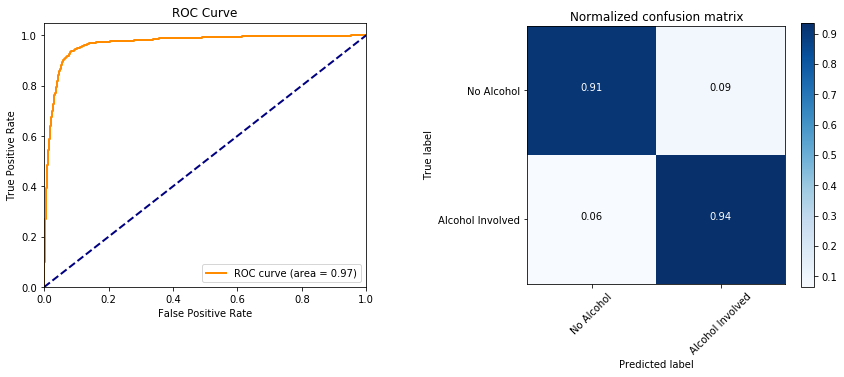

In [65]:
# define figure and add subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

y_score = clf.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
ax1.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=['No Alcohol', 'Alcohol Involved'], normalize=True,
                      title='Normalized confusion matrix')

# adjust spacing
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.5, hspace=None)